### attention visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### sequence branch

(580, 1, 61, 20)
(61, 20)


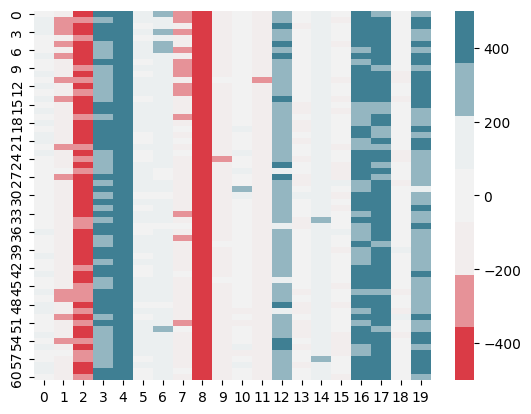

In [2]:
# load data
middle_output_trans_xsb = np.load('../model/middle_output/trans_xsb_output.npy')
print(middle_output_trans_xsb.shape) # (550, 1, 61, 20)
trans_xsbsum_array = np.sum(middle_output_trans_xsb, axis=0)
trans_xsbsum_array = np.sum(trans_xsbsum_array, axis=0)
print(trans_xsbsum_array.shape) # (61, 20)

sns.heatmap(trans_xsbsum_array,vmin=-500,vmax=500,cmap=sns.diverging_palette(10, 220, sep=80, n=7))
plt.show()

(580, 1, 61, 20)
(61, 20)


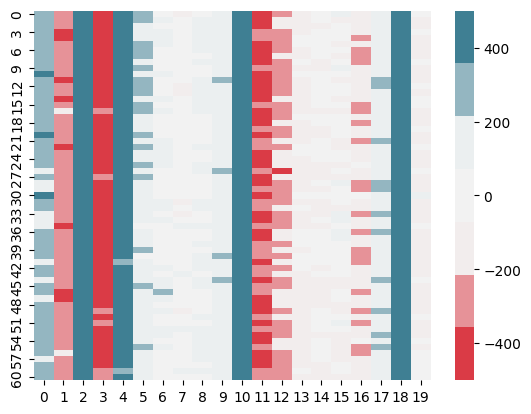

In [3]:
# load data
middle_output_trans_xsa = np.load('../model/middle_output/trans_xsa_output.npy')
print(middle_output_trans_xsa.shape) # (550, 1, 61, 20)
trans_xsasum_array = np.sum(middle_output_trans_xsa, axis=0)
trans_xsasum_array = np.sum(trans_xsasum_array, axis=0)
print(trans_xsasum_array.shape) # (61, 20)

sns.heatmap(trans_xsasum_array,vmin=-500,vmax=500,cmap=sns.diverging_palette(10, 220, sep=80, n=7))
plt.show()

(61, 20)


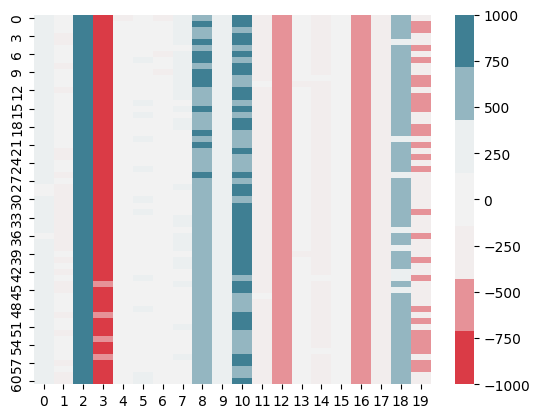

In [4]:
ddarray = trans_xsasum_array - trans_xsbsum_array
print(ddarray.shape)

sns.heatmap(ddarray,vmin=-1000,vmax=1000,cmap=sns.diverging_palette(10, 220, sep=80, n=7))
plt.show()

(61, 20)


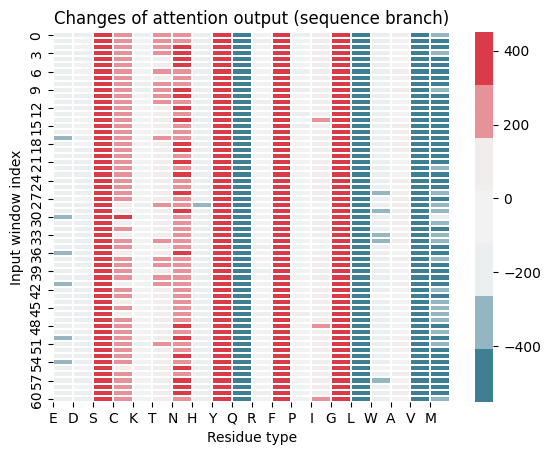

In [7]:
# resort columns
new_array = np.array([ddarray[:,17],ddarray[:,1],ddarray[:,2],ddarray[:,0],ddarray[:,4],ddarray[:,7],ddarray[:,9],ddarray[:,11],ddarray[:,18], ddarray[:,3],ddarray[:,13], # polarity
                    ddarray[:,8],ddarray[:,6],ddarray[:,5],ddarray[:,10],ddarray[:,12],ddarray[:,14], ddarray[:,15],ddarray[:,16],ddarray[:,19]])
new_array = new_array.T
print(new_array.shape)
#sns.heatmap(new_array,vmin=-550,vmax=450,cmap=sns.diverging_palette(10, 220, sep=80, n=7),linewidths=.1)
sns.heatmap(new_array,vmin=-550,vmax=450,cmap=sns.diverging_palette(220, 10, sep=80, n=7),linewidths=.1)

plt.xticks(ticks=np.arange(20).tolist(),labels=['E','D','S','C','K','T','N','H','Y','Q','R',
            'F','P','I','G','L','W','A','V','M'])
plt.xlabel('Residue type')
plt.ylabel('Input window index')
plt.title('Changes of attention output (sequence branch)')
plt.savefig('images/sequence-attention-vis.png',dpi=300)

plt.show()

(671,)
(549,)
MannwhitneyuResult(statistic=212064.0, pvalue=5.292054722924814e-06)


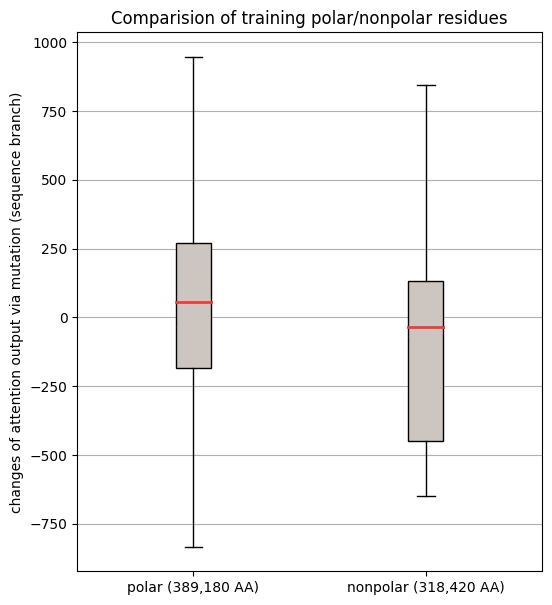

In [16]:
polar = np.concatenate([ddarray[:,0],ddarray[:,1],ddarray[:,2],ddarray[:,3],ddarray[:,4],ddarray[:,7],ddarray[:,9],ddarray[:,11],ddarray[:,13], ddarray[:,17],ddarray[:,18]],axis=0)
print(polar.shape)
nonpolar = np.concatenate([ddarray[:,5],ddarray[:,6],ddarray[:,8],ddarray[:,10],ddarray[:,12],ddarray[:,14], ddarray[:,15],ddarray[:,16],ddarray[:,19]],axis=0)
print(nonpolar.shape)

from scipy import stats
print(stats.mannwhitneyu(polar,nonpolar,alternative='two-sided'))

fig, ax = plt.subplots(figsize=(6,7))
box_plot = ax.boxplot((polar, nonpolar,), labels=['polar (389,180 AA)','nonpolar (318,420 AA)'], 
            patch_artist=True,boxprops=dict(facecolor='#CDC5BF'),
            medianprops=dict(color='#CDC5BF',linewidth=0.1,linestyle='--'),
            showmeans=True,meanline=True,showfliers=False,
            meanprops=dict(color='#EE3B3B', linestyle='-',linewidth=2))

colors = ['pink', 'blue']
ax.yaxis.grid(True)

plt.ylabel('changes of attention output via mutation (sequence branch)')
plt.title('Comparision of training polar/nonpolar residues')
plt.savefig('images/polarity-comparision.png',dpi=300)
plt.show()

(61, 20)


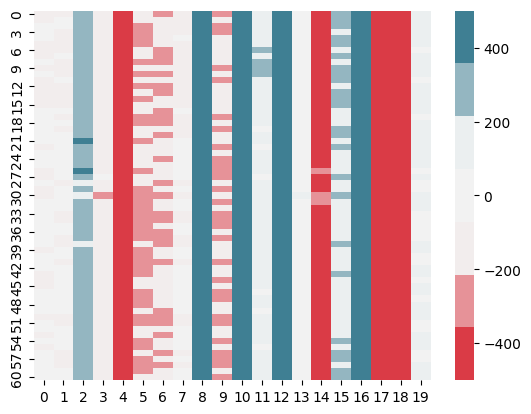

In [9]:
# resort by hydrophilia
kyte_sort = np.array([ddarray[:,13],ddarray[:,4],ddarray[:,9],ddarray[:,1],ddarray[:,3],ddarray[:,17],ddarray[:,11],ddarray[:,6],ddarray[:,18], ddarray[:,14],
                    ddarray[:,2], ddarray[:,7],ddarray[:,10],ddarray[:,15],ddarray[:,19],ddarray[:,0],ddarray[:,8], ddarray[:,12],ddarray[:,16],ddarray[:,5]]) 
kyte_sort = kyte_sort.T
print(kyte_sort.shape)
sns.heatmap(kyte_sort,vmin=-500,vmax=500,cmap=sns.diverging_palette(10, 220, sep=80, n=7))

plt.show()

(793,)
(427,)
MannwhitneyuResult(statistic=192958.0, pvalue=5.589788790460364e-05)


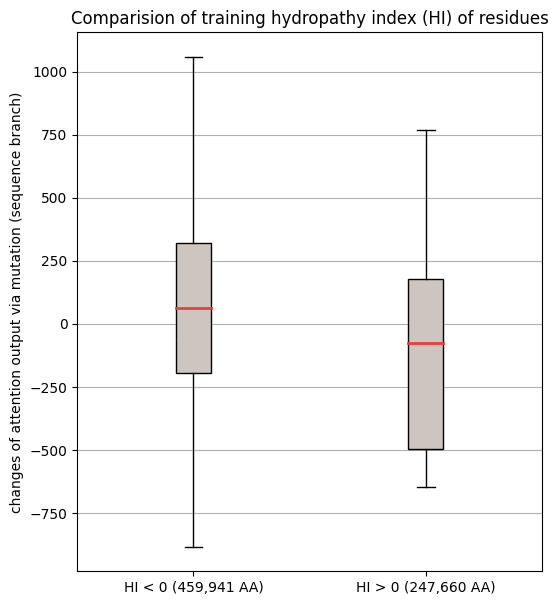

In [18]:
hydrophilic = np.concatenate([ddarray[:,13],ddarray[:,4],ddarray[:,9],ddarray[:,1],ddarray[:,3],ddarray[:,17],ddarray[:,11],ddarray[:,6],ddarray[:,18], ddarray[:,14],
                    ddarray[:,2], ddarray[:,7],ddarray[:,10]],axis=0)
print(hydrophilic.shape)
nonhydrophilic = np.concatenate([ddarray[:,15],ddarray[:,19],ddarray[:,0],ddarray[:,8], ddarray[:,12],ddarray[:,16],ddarray[:,5]],axis=0)
print(nonhydrophilic.shape)

from scipy import stats
print(stats.mannwhitneyu(hydrophilic,nonhydrophilic,alternative='two-sided'))

fig, ax = plt.subplots(figsize=(6,7))
box_plot = ax.boxplot((hydrophilic, nonhydrophilic,), labels=['HI < 0 (459,941 AA)','HI > 0 (247,660 AA)'], 
            patch_artist=True,boxprops=dict(facecolor='#CDC5BF'),
            medianprops=dict(color='#CDC5BF',linewidth=0.1,linestyle='--'),
            showmeans=True,meanline=True,
            meanprops=dict(color='#EE3B3B', linestyle='-',linewidth=2))

colors = ['pink', 'blue']
ax.yaxis.grid(True)

plt.ylabel('changes of attention output via mutation (sequence branch)')
plt.title('Comparision of training hydropathy index (HI) of residues')
plt.savefig('images/hydrophilic-comparision.png',dpi=300)
plt.show()

#### fingerprint branch

(580, 1, 881, 64)
(1, 881)


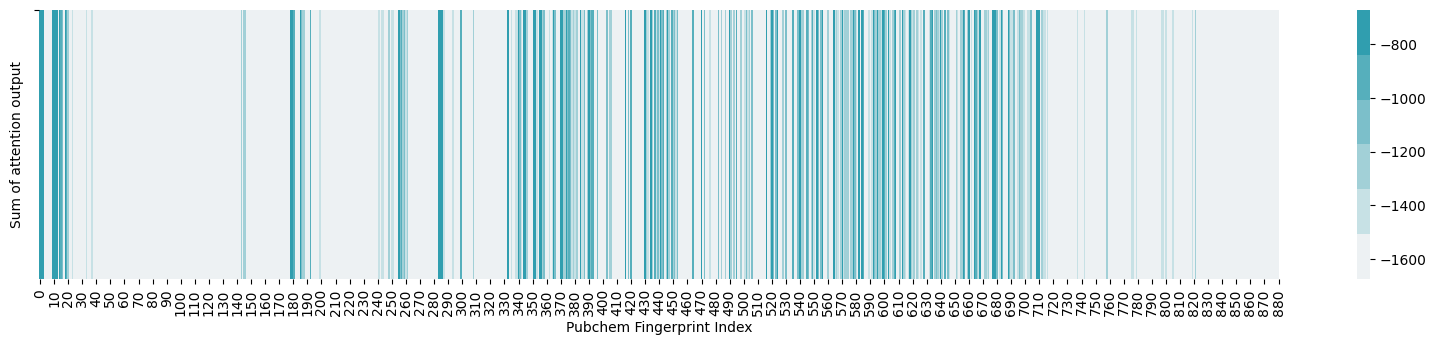

In [73]:
# load data
middle_output_trans_f = np.load('../model/middle_output/trans_f_output.npy')
print(middle_output_trans_f.shape) # (580, 1, 881, 64)
trans_fsum_array = np.sum(middle_output_trans_f, axis=0)
trans_fsum_array = np.sum(trans_fsum_array, axis=2)
#trans_fsum_array = np.sum(trans_fsum_array, axis=1)
print(trans_fsum_array.shape) # (61, 20)
#trans_fsum_array = trans_fsum_array.reshape(881,1)

plt.figure(figsize=(20, 3.5))
sns.heatmap(trans_fsum_array,cmap=sns.light_palette((210, 90, 60), input="husl"))
plt.yticks(ticks=[0],labels=[''])
plt.xlabel('Pubchem Fingerprint Index')
plt.ylabel('Sum of attention output')
plt.savefig('images/fingerprint-attention-vis.png',dpi=300)
plt.show()